# Chromatin Ensemble Refinement 
## 1. Objective 
* Infer the ensemble of chromatin structures $X = {x_m}$ and their weights $\alpha_m$ with $m \in {1, ..., M}$.
  * $M$ is the toal number of structures. This is a predefined hyperparameter. This variable affects the accuracy and the stability of the ensemble refinement.
* Infer $X$ from a set of single-cell distance matrix $D_n$ with $n \in {1, ..., N}$.
  * \mathcal{D} = {D_n} is the full sety of single-cell observations.

## 2. Forward Model 
* Each structure $x_m = \{\vec{r_i}\}_{i=1}^{N_{\text{probes}}}$.
  * $\vec{r_i}$ is a row vector with 3 columns represent a 3D position of probe $i$. 
* Assume that each chromatin is a polymer chain and a Gaussian noise for the measurements. 
  * If the distance matrix is complete, then there is a one-to-one correspondence between 3D structure and the distance matrix $$x \longleftrightarrow D$$
where $D_{ij} = \lVert \vec{r_i} - \vec{r_j} \rVert _2$
  

## 3. Posterior
* We will build on the methods developed for single-particle cryo-EM to develop the chromatin ensemble refinement pipeline.
* Posterior can be written as $$ p(\alpha, X| \mathcal{D}) \propto \prod_{n=1}^N \left[\sum_{m=1}^M \alpha_m \, p(D_n|x_m) \, p(\alpha_m) \, p(x_m) \right]$$

where $X = {x_m}$ is the ensemble of $M$ chromatin structures. 

* Here we assume that all single-cell measurements, the priors over weights $p(\alpha)* and structures $p(x_m)$ are independent.
* Under the Gaussian noise model, we assume that all distance observations are i.i.d, so we can write $$p(D_n|x_m) = \prod_{i=1}^{N_{\text{probes}}}\prod_{j=1}^{N_{\text{probes}}}\frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{(D_n^{ij}-D_m^{ij})^2}{2\sigma^2}} = \frac{1}{(\sqrt{2\pi}\sigma)^{N^2_{\text{probes}}}}\exp{\frac{-\lVert D_n - D_m \rVert _2^2}{2\sigma^2}}$$

In [8]:
import jax 
import scipy
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# define some helper functions 

def generate_gaussian_chain(num_monomers: int, 
                            mean_bond_length: float, 
                            std_bond_length: float):
    """Generate a Gaussian chain polymer 
    
    Parameters
    ----------
    num_monomers
    mean_bond_length
    std_bond_length
    
    Return
    ------
    np.array 
    
    Notes
    -----
    """ 
    # Generate steps: each step is a 3D vector 
    steps = np.random.normal(mean_bond_length, std_bond_length, size=(num_monomers, 3))
    
    # Compute positions by cumulative sum of steps
    positions = np.cumsum(steps, axis=0)
    
    return positions

In [ ]:
def visualize_polymer()

In [5]:
# Example of a gaussian chain 
# with 1000 monomers, mean bond length = 10, and std bond length = 1
num_monomers = 1000
mean_bond_length = 10 
std_bond_length = 1

chain = generate_gaussian_chain(num_monomers, mean_bond_length, std_bond_length)

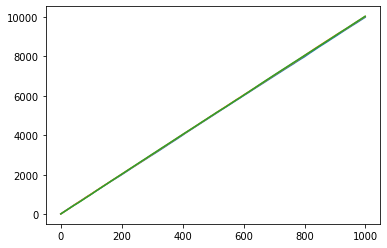